In [57]:
# Let us do dimensionality reduction with the iris dataset

# Import libraries
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

print('The data has shape: {}'.format(iris.data.shape))

The data has shape: (150, 4)


Explained variance percentage = 0.99


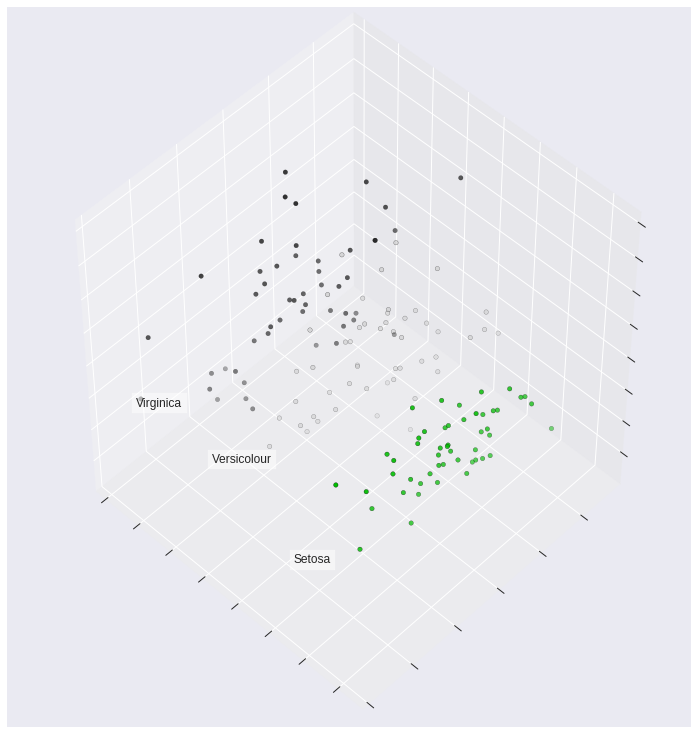

In [58]:
# Perform PCA to reduce dimensionality to 3 dimensions instead of the original 4
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_reduced[y == label, 0].mean(),
              X_reduced[y == label, 1].mean() + 1.5,
              X_reduced[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


Explained variance percentage = 0.98


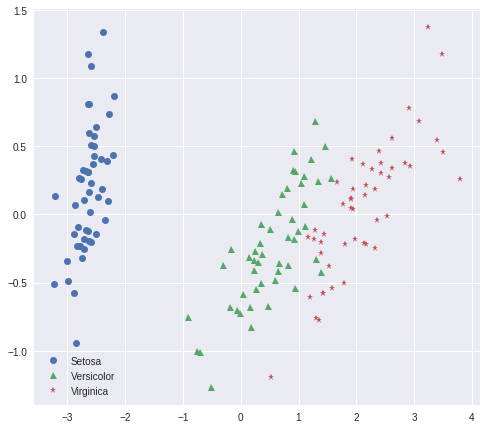

In [59]:
# Now let's reduce to 2 dimensions
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))

plt.figure(4,figsize=(8,16))
plt.subplot(2,1,1)
plt.plot(X_reduced[iris.target == 0,0], X_reduced[iris.target == 0,1], 'o')
plt.plot(X_reduced[iris.target == 1,0], X_reduced[iris.target == 1,1], '^')
plt.plot(X_reduced[iris.target == 2,0], X_reduced[iris.target == 2,1], '*')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

In [56]:
# Just for fun, let's reduce from 4 dimensions to 1
pca = PCA(n_components=1)
pca.fit(X)
X_reduced = pca.transform(X)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))

Explained variance percentage = 0.92


Well this is interesting. Right?


1.   Do you think dimensionality reduction is important? Why? Why not?
2.   Do you come up with any real world applications? 
3.   Do you thin it is used anywhere?

